In [2]:
!pip install opencv-python matplotlib

In [9]:
from google.colab import files
uploaded=files.upload()

Saving image to image


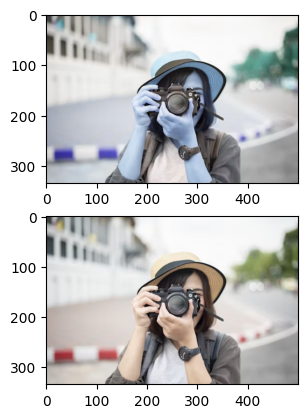

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import subplot
uploaded_files = list(uploaded.keys()) [0]
img1=cv2.imread(uploaded_files)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
subplot(2,1,1)
plt.imshow(img1)
subplot(2,1,2)
plt.imshow(img)

Orthogonal Transformation (rotation)

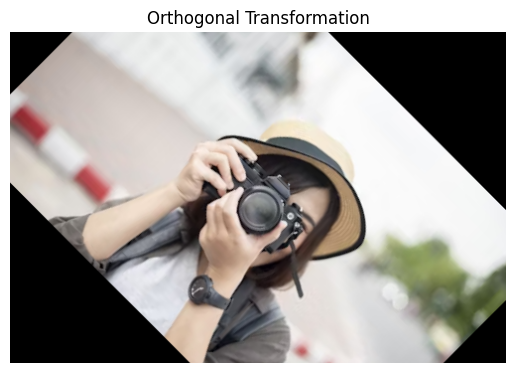

In [20]:
h,w =img.shape[:2]
def orthogonal_transform(img,angle_degree):
  angle_rad =np.deg2rad(angle_degree)
  M =np.array([
      [np.cos(angle_rad),-np.sin(angle_rad)],
      [np.sin(angle_rad),np.cos(angle_rad)]
  ])
  center =np.array([w/2,h/2])
  transform=np.hstack([M, np.dot(-M,center[:,None])+center [:, None]])
  transformed = cv2.warpAffine(img,transform,(w,h))
  plt.imshow(transformed)
  plt.title("Orthogonal Transformation")
  plt.axis('off')
  plt.show()
orthogonal_transform(img,45)

Euclidean Transformation  (Rotation +Translation)

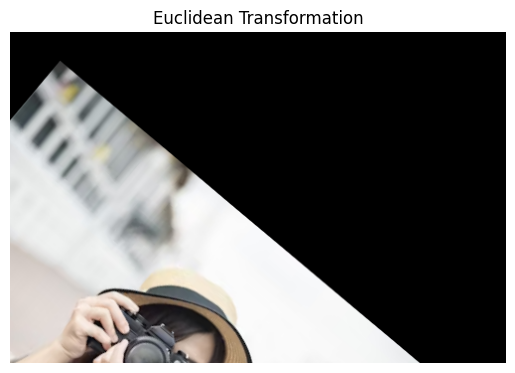

In [29]:

def euclidean_transform(img,angle_degree,tx,ty):
  angle_rad = np.deg2rad(angle_degree)
  M=np.array([
      [np.cos(angle_rad), -np.sin(angle_rad)],
      [np.sin(angle_rad), np.cos(angle_rad)]
  ])
  t =np.array([[tx],[ty]])
  transform = np.hstack([M,t])

  transformed = cv2.warpAffine(img,transform,(w,h))
  plt.imshow(transformed)
  plt.title("Euclidean Transformation")
  plt.axis('off')
  plt.show()
euclidean_transform(img, 40, 50, 30)

Affine transform

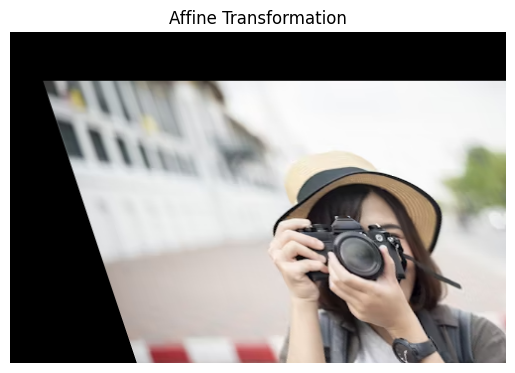

In [30]:
def affine_transform(img, src_pts, dest_pts):

  src_pts = np.float32(src_pts)
  dest_pts = np.float32(dest_pts)

  M = cv2.getAffineTransform(src_pts, dest_pts)

  transformed = cv2.warpAffine(img, M, (w, h))

  plt.imshow(transformed)
  plt.title("Affine Transformation")
  plt.axis('off')
  plt.show()

src_points = np.array([[50, 50], [200, 50], [50, 200]])
dest_points = np.array([[100, 100], [250, 100], [150, 250]])

affine_transform(img, src_points, dest_points)